___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>


**By Drew Sims**

The follwing project was an exercise project given by Pierian Data in the Python for Time-Series Data Science Bootcamp.

# Carbon Emissions Time Series SARIMA (Seasonal) Forecast:

This dataset is from the Mauna Loa Observatory in Hawaii at a Latitude of 19.5 N and Longitude of 155.6 W. The elevation of the data is collected at 3397 m. The dataset measures the amount of In-situ CO2 in the atmosphere from 1958 to present time.

**The purpose of this project is to explore the trends of the CO2 time-series dataset, and make predictions about CO2 levels in the future.** 

SARIMAX handles exogenous regressor variables

**The steps of this process include:**

**1.)** Loading in of necessary libraries

**2.)** Loading the csv data in

**3.)** Combining information from multiple columns to create a datetime64 index

**4.)** Determine if the data has seasonality or not

**5.)** Find optimal orders of SARIMAX parameters (P,D,Q)

**6.)** Train/Test Split Data

**7.)** Create model and fit model to data

**8.)** Predict Data

**9.)** Evaluate model performance metrics

**10.)** Forecast Future Predictions

**11.)** Observations

# **Step 1:** Import Libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
from pmdarima import auto_arima

# **Step 2:** Load CSV data of Carbon Data into jupyter notebook/Pandas

In [6]:
df = pd.read_csv('..//Data//co2_mm_mlo.csv')

In [7]:
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [8]:
# The data extends from  March 1958 to November 2018
# The year and month in separate columns. We need to combine this information in a date-time index

df.tail(5)

,year,month,decimal_date,average,interpolated
724,2018,7,2018.542,408.71,408.71
725,2018,8,2018.625,406.99,406.99
726,2018,9,2018.708,405.51,405.51
727,2018,10,2018.792,406.00,406.00
728,2018,11,2018.875,408.02,408.02


# **Step 3:** Change the index to a datetime64 data type

In [9]:
# Add in a date column
    # Designate each column to its correct to_datetime function

df['date'] = pd.to_datetime({'year':df['year'],'month':df['month'],'day':1})

In [10]:
# Can also do previous step in a function

# dict(year=df['year'], month=df['month'],day=1)

In [11]:
# Check to see if column is now in place

df.head()

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [12]:
# Ensure the data in the 'date' column is a datetime64 object

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          729 non-null    int64         
 1   month         729 non-null    int64         
 2   decimal_date  729 non-null    float64       
 3   average       722 non-null    float64       
 4   interpolated  729 non-null    float64       
 5   date          729 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.3 KB


In [13]:
# Make the 'date' column the index

df = df.set_index('date')
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


In [14]:
# Set the index frequency to be at the start of every month since that is the interval of the datetime index

df.index.freq = 'MS'

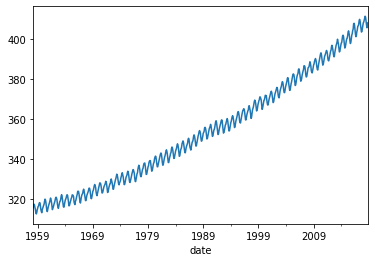

In [15]:
# The interpolated column fills nulls values with averaged data of month before and after of the null values

df['interpolated'].plot()

# 4.) Determine Seasonality (stationary or non-stationary)

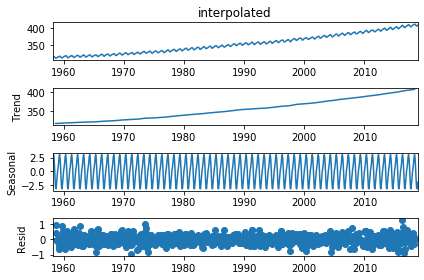

In [16]:
# It can be observed that there is seasonality and a upward trend to this data
# To confirm this we can run an ETS Decomposition
# Due to the seasonal nature of the data, we will use a SARIMA model

result = seasonal_decompose(df['interpolated'],model='add')
result.plot();

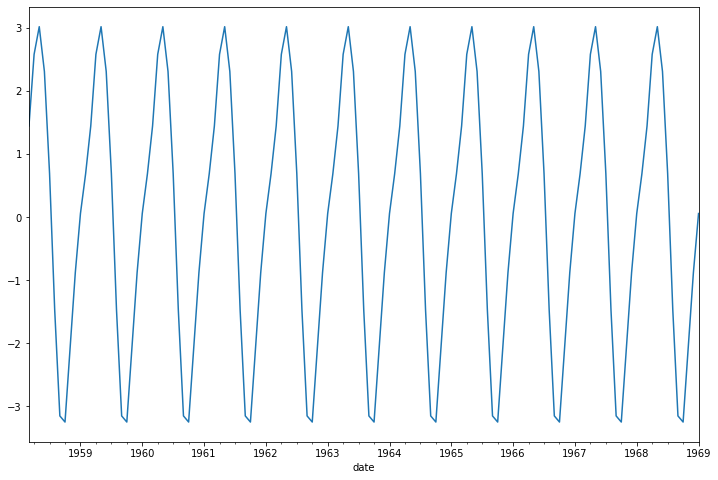

In [17]:
# Determine the seasonal lenght of the data (i.e Months, Years, Decades, etc...)
# There appears to a yearly seasonality 

result.seasonal[:'1969-01-01'].plot(figsize = (12,8));

# 5.) Finding Optimal SARIMA Parameters

In [18]:
# Obtain reccomended orders of parameters P,Q, and D
# The seasonality is based on the year, so the number of periods (Months) would be 12
# The MLE convergence errors with statespace SARIMAX can be ignored
    # The author of the library talks about different optimizations that can be done

auto_arima(df['interpolated'],seasonal=True,m=12).summary()

C:\Users\Drew\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Drew\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Drew\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Drew\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Drew\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -209.343
Date:                            Mon, 28 Jun 2021   AIC                            428.686
Time:                                    19:01:59   BIC                            451.637
Sample:                                         0   HQIC                           437.542
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.171e-05      0.000      0.352      0.725      -0.000       0.000
ma.L1         -0.3705      0.034    -11.034      0.000      -0.436      -0.305
ar.S.L12       0.9997      0.000   3183.249      0.000       0.999       1.000
ma.S.L12      -0.8657      0.021    -40.287      0.000      -0.908      -0.824
sigma2         0.0959      0.005     20.421      0.000       0.087       0.105
===================================================================================
Ljung-Box (Q):                       50.85   Jarque-Bera (JB):                 3.74
Prob(Q):                              0.12   Prob(JB):                         0.15
Heteroskedasticity (H):               1.13   Skew:                            -0.04
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 6.) Train Test Split

In [19]:
# Check the length of the dataset to see how much data we want to split between the test and train set

len(df)

729

In [20]:
# Split the data amongst training and test sets

train = df.iloc[:717]
test = df.iloc[717:]

# 7.) Create Model and Fit Data

In [21]:
# Create the SARIMAX model using parameters found in auto_arima

model = SARIMAX(train['interpolated'],order=(0,1,1),seasonal_order=(1,0,1,12))

In [22]:
# Fit the model for the results

results = model.fit()

C:\Users\Drew\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [23]:
# Check the summary of results

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -205.148
Date:                            Mon, 28 Jun 2021   AIC                            418.297
Time:                                    19:02:02   BIC                            436.591
Sample:                                03-01-1958   HQIC                           425.361
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3711      0.034    -10.792      0.000      -0.438      -0.304
ar.S.L12       0.9997      0.000   3215.357      0.000       0.999       1.000
ma.S.L12      -0.8650      0.023    -37.723      0.000      -0.910      -0.820
sigma2         0.0960      0.005     20.210      0.000       0.087       0.105
===================================================================================
Ljung-Box (Q):                       51.98   Jarque-Bera (JB):                 3.80
Prob(Q):                              0.10   Prob(JB):                         0.15
Heteroskedasticity (H):               1.13   Skew:                            -0.02
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 8.) Predict Data

In [24]:
# Next, we want to get predicted values for our test set

# define start and end variables for .predict
start = len(train)
end = len(train) + len(test) -1

# create predictions and assign to a variable to be plotted later on for comparison
predictions = results.predict(start=start,end=end,typ='levels').rename('SARIMA Predictions')

# 9.) Evaluate Model/Performance Metrics

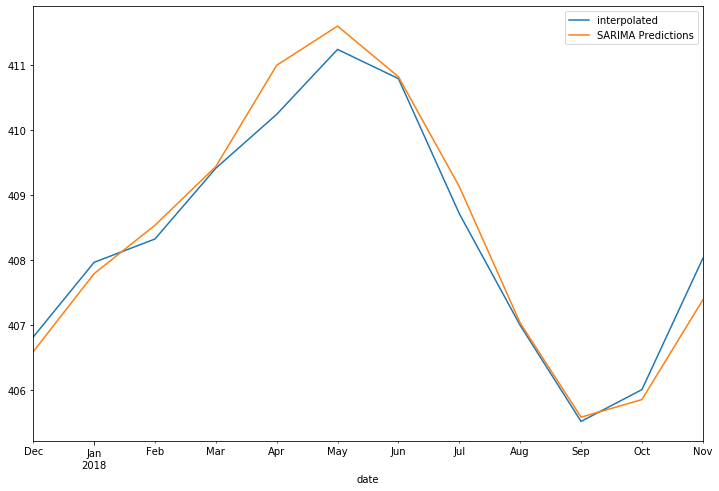

In [25]:
# Plot test data vs predictions

test['interpolated'].plot(legend=True,figsize=(12,8))
predictions.plot(legend=True);

In [26]:
# We can evaluate the model with RMSE (Root Mean Squared Error)

from statsmodels.tools.eval_measures import rmse

In [27]:
# compare rmse error of the predictions
# our rmse is 0.34

error = rmse(test['interpolated'],predictions)
error

0.34621259330917215

In [28]:
# To see if this error is bad we must check out the mean of our test values
# Given the range of the data is in the 400's then the rmse error of 0.34 can be viewed as a minimal amount of error

test['interpolated'].mean()

408.3333333333333

# 10.) Forecast Future Predictions

In [29]:
# Build the model for the predictions of future dated with adjusted SARIMA parameters
# Fit the model to the data

model = SARIMAX(df['interpolated'],order=(0,1,1),seasonal_order=(1,0,1,12))
results = model.fit()

In [30]:
# make a forecasting instance that predicts the future CO2 data

fcast = results.predict(len(df),len(df)+11,typ='levels').rename('SARIMA FORECAST')

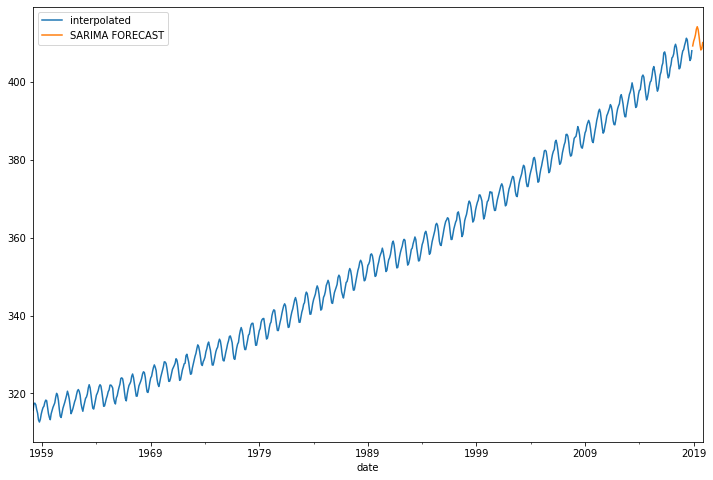

In [31]:
# Plot the forecasted data versus the past data

df['interpolated'].plot(legend=True,figsize=(12,8))
fcast.plot(legend=True)

# Observations

With a RMSE of 0.34, it can be concluded that this forecasting can be considered accurate. When plotted out, the forecasted data appears to continue the seasonal trend. There are many factors that could affect this data. One factor could be the amount of carbon emissions coming from cars. The peaks of the carbon emissions come from the warm months when traveling is most present. During the colder months less travel may be occuring.